# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('kaggle_movie_train.csv')

# **Exploring the dataset**

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

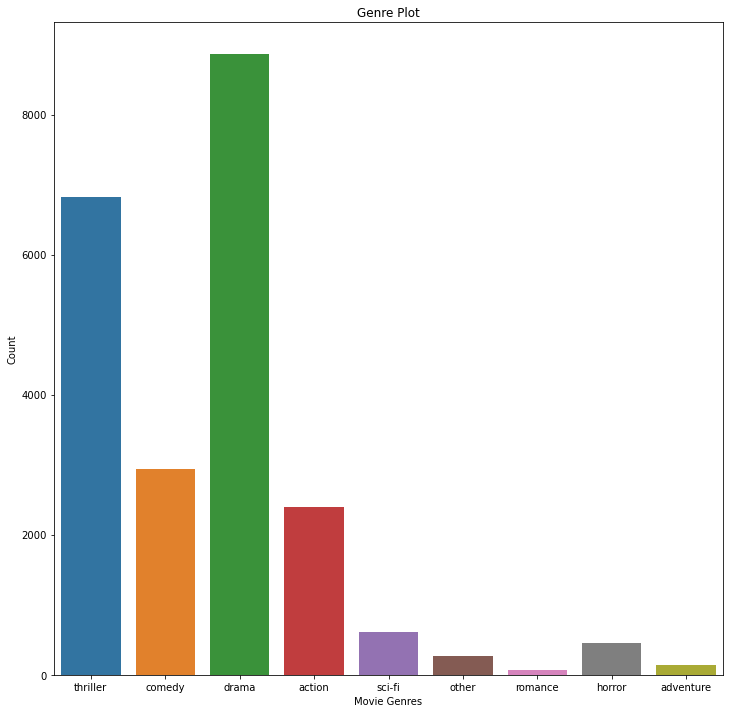

In [7]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [8]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [9]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [11]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [13]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
df.shape

(22579, 2)

In [15]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [16]:
corpus[0:5]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [17]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [18]:
len(corpus)

22579

In [19]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

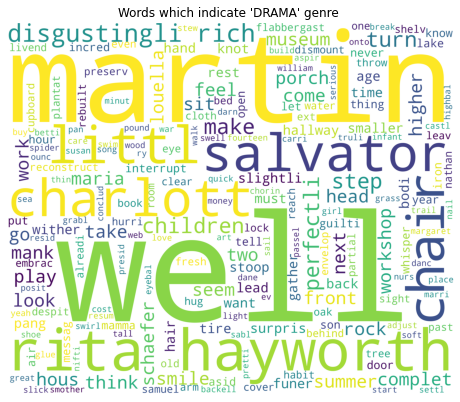

In [22]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

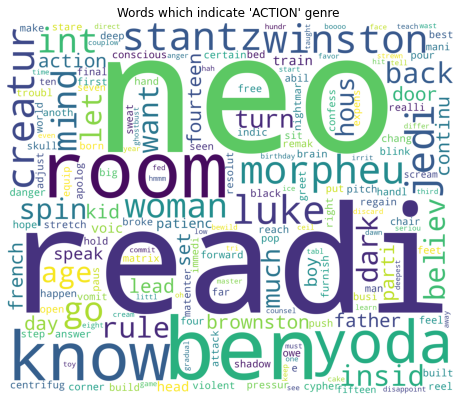

In [23]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

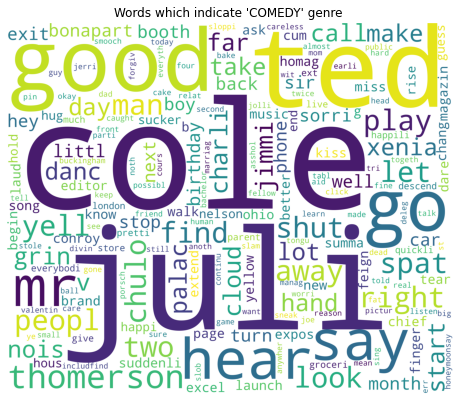

In [24]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [26]:
y = df['genre'].values

# **Model Building**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [29]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [30]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [32]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

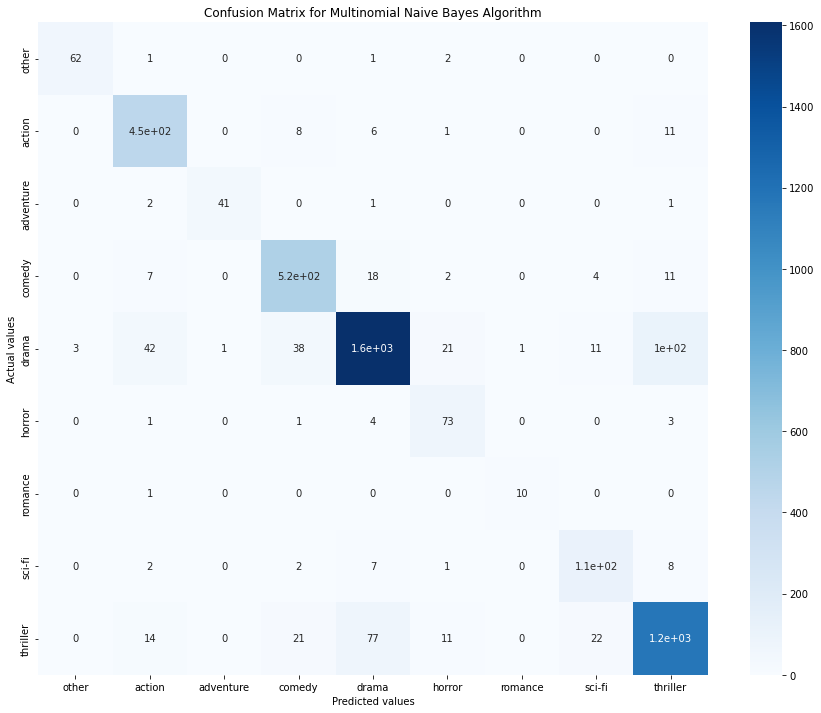

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [34]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [35]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [36]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [37]:
# For generating random integer
from random import randint

In [38]:
# Loading test dataset
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [39]:
test.shape

(5589, 2)

In [40]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: and I stopped somebody on the street and they told me I was in Detroit. So that was no help. But I did have some money on me, so I hopped in a cab until I saw somethin' that looked familiar. For some reason, and don't ask me why, that theater looked familiar. So I told him to stop and I got out. CLARENCE And in a theater full of empty seats, why did you sit by me? ALABAMA Because you looked like a nice guy, and I was a little scared. And I sure couldda used a nice guy about that time, so I spilled my popcorn on you. Clarence looks at her closely. He picks up his soda and sucks on the straw until it makes that slurping sound. He puts it aside and stares into her soul. A smile cracks on her face and develops into a big wide grin. ALABAMA Aren't you just dazzled by my imagination, lover boy? eats her last piece of pie Where to next? INT. COMIC BOOK STORE NIGHT It's about 1 30 a.m. Clarence has taken Alabama to where he works. It's a comic book store called Heroes For Sale. Alabama

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  Sunset. Ringo's seconds wait nearby as Wyatt whispers to his men WYATT They're not givin' you any safe Conduct. Soon as the shooting Starts kick east for the New Mexico line. Well... Wyatt shakes hands with Vermillion who turns away with emotion, hiding his face. Wyatt turns to Johnson. JOHNSON Wyatt, I... I ain't got the words. WYATT I know. Me neither. Wyatt pats his shoulder and walks off alone into the thicket, the only sound the musical clinking and chiming of his spurs.... EXT THICKET SUNSET A gorgeous sunset, yellow and red and magenta. Making his way down the trail, Wyatt looks up at the sky. A flock of wild geese fly overhead in V formation, oblivious to the human drama below. Wyatt stops, drinking it all in, as if trying to grab all he can in the time left. Suddenly he closes his eyes, falling to his knees, trembling, afraid for the first time. He clasps his hands WYATT Dear God, this is the last Battle. I worked it out in my Head every which way and I know There's n

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  have to bring you to a cell. STEVEN Are you crazy?! RANDY I know, I know, I'm sorry but the Sheriff is just berserk right now. C'mon. 34 INT. MAIN ROOM OF POLICE STATION DAWN Randy leads Steven from the interrogation room towards the jail cell block. RANDY Hopefully we won't have to hold you more than a day. I'm gonna bust my ass to prove you innocent but you gotta be cool or Landis will really kil you, okay? Okay? Steven has not been paying attention he's staring at something on the other side of the room. HIS POV Jessica enters through the front door with Vicki. ON STEVEN In his eyes we see that, in spite of whatever might have happened in the past, he really loves this girl. STEVEN ...Jessica... ON JESSICA As she suddenly turns and lifts something up into view the baby. ON STEVEN As his eyes widen, realizing what this means, what it was that Diana was going to tell him, what Landis meant by his talk about a miscarriage . This is his daughter he's looking at. STEVEN My God..

In [44]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: m door, steps inside. 184 INT. BUILDING DAY ON THE ATTENDANT as he kicks a rock against the door to hold it open. That done, the CAMERA PANS with him as he crosses the Museum which consists of one room with four or five glass cases filled with rocks, a stuffed alligator and a few swords and spears mounted on the wall. He sits down at a desk, props his feet on the top and promptly falls sound asleep. HOLD for a beat as we HEAR O.S. SOUND a CAR APPROACHING. The CAMERA PANS across to a window and we SEE a Land Rover pull to a stop in front of the Museum. The door opens and LEX LUTHOR, followed by EVE, ALBERT, and OTIS, gets out. LUTHOR wears a pith helmet. CUT TO 185 EXT. STREET DAY ON LUTHOR looking around, filled with enthusiasm. LUTHOR Ah! The wonders of travel! The glories of past civilizations! ON EVE not thrilled to be here at all. EVE There speaks a man who lives in a sewer. CROSS CUTTING between them. LUTHOR Breathe that air, Miss Teschmacher. EVE with a look I will as soo

In [45]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: n, goes out of the picture. CLOSE SHOT TELEPHONE TABLE Mariette enters, picks up phone. MARIETTE Hello ... Yes .. . Where did you find the bag? Amused. Where? Even more amused. Where? What? Smiling broadly. What was in it? With a change of expression, outraged. How dare you! She slams down receiver. CLOSE SHOT ELDERLY WOMAN bag in hand, with patient hope. CLOSE SHOT MARIETTE at phone. Her expression softens. Followed by camera, she goes to woman. WOMAN You wouldn't have any use for it? Mariette hesitates. You see, I have another bag, and I really don't need this. So, if you'd like to buy it ... Mariette sees tears in the woman's eyes. MARIETTE reaching into drawer of nearby table Would two hundred francs be sufficient? WOMAN this is much more than she expected Yes, madame. Mariette hands her the money. WOMAN overwhelmed Oh, thank you, madame! She goes out of picture toward door. Mariette looks after her with compassion, which is broken by the ringing phone. Increasingly annoyed